# **Missing Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
df = pd.DataFrame(data = { 'feature_1': [np.nan, 12,45,34,19,29, np.nan],
                          'feature_2': [19,29,39,np.nan,np.nan,np.nan,100],
                          'feature_3': [45,27,19,11,7,22,31]})

#print out the dataframe
print(df)

   feature_1  feature_2  feature_3
0        NaN       19.0         45
1       12.0       29.0         27
2       45.0       39.0         19
3       34.0        NaN         11
4       19.0        NaN          7
5       29.0        NaN         22
6        NaN      100.0         31


In [ ]:
df.isnull().sum()

feature_1    2
feature_2    3
feature_3    0
dtype: int64

In [ ]:
#we can use the fillna method to fill all NaNs with the previous value. 
#notice that we only did the next value by using limit = 1
#also we use inplace because otherwise it is making a copy

df_fill = df.copy()
df_fill.fillna(method='pad', limit=1,inplace=True)
print(df_fill)

   feature_1  feature_2  feature_3
0        NaN       19.0         45
1       12.0       29.0         27
2       45.0       39.0         19
3       34.0       39.0         11
4       19.0        NaN          7
5       29.0        NaN         22
6       29.0      100.0         31


In [ ]:
#bfill (back fill) and ffill (forward fill) use the previous values to fill in
#either going backwards or forwards

df_fill1 = df.copy()
df_fill1.fillna(method='bfill', inplace=True)
print(df_fill1)

   feature_1  feature_2  feature_3
0       12.0       19.0         45
1       12.0       29.0         27
2       45.0       39.0         19
3       34.0      100.0         11
4       19.0      100.0          7
5       29.0      100.0         22
6        NaN      100.0         31


In [ ]:
#dropna drops rows with axis = 0
#columns with axis = 1

df_drop_example = df.copy()
df_drop_example.dropna(axis = 0, inplace = True)
print(df_drop_example)

   feature_1  feature_2  feature_3
1       12.0       29.0         27
2       45.0       39.0         19


In [ ]:
#use dropna to drop features that have some percentage missing
#here we drop any columns with 5% or more missing

drop_threshold = df.copy()
drop_threshold.dropna(thresh = int(drop_threshold.shape[0]*.95), axis = 1,inplace = True)
print(drop_threshold)

   feature_3
0         45
1         27
2         19
3         11
4          7
5         22
6         31


In [ ]:
#use a statistic to fill in the data

df_statFill = df.copy()
for k in df_statFill:
  df_statFill[k].fillna(df_statFill[k].median(),inplace=True)

print(df_statFill)

   feature_1  feature_2  feature_3
0       29.0       19.0         45
1       12.0       29.0         27
2       45.0       39.0         19
3       34.0       34.0         11
4       19.0       34.0          7
5       29.0       34.0         22
6       29.0      100.0         31


#**Detecting and Handling Outliers**

In [ ]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. This data is related to mall visitors
#we are reading a json file
filename = "https://raw.githubusercontent.com/MatthewFried/Udemy/master/Statistics/Mall_Customers.json"
df = pd.read_json(filename)

#create a copy just in case
stored_values = df.copy()

df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [ ]:
#check that there are no null values
df.isnull().any()

customer_id       False
gender            False
age               False
annual_income     False
spending_score    False
dtype: bool

In [ ]:
#check the shape and unique values
print("Data size ", df.shape)
print(df.nunique())

Data size  (200, 5)
customer_id       200
gender              2
age                51
annual_income      64
spending_score     84
dtype: int64


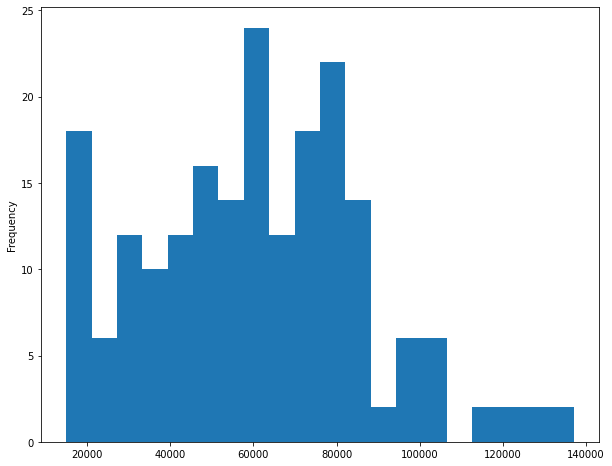

In [ ]:
#check for outlier data using a histogram
df['annual_income'].plot.hist(bins= 20, figsize=(10,8))

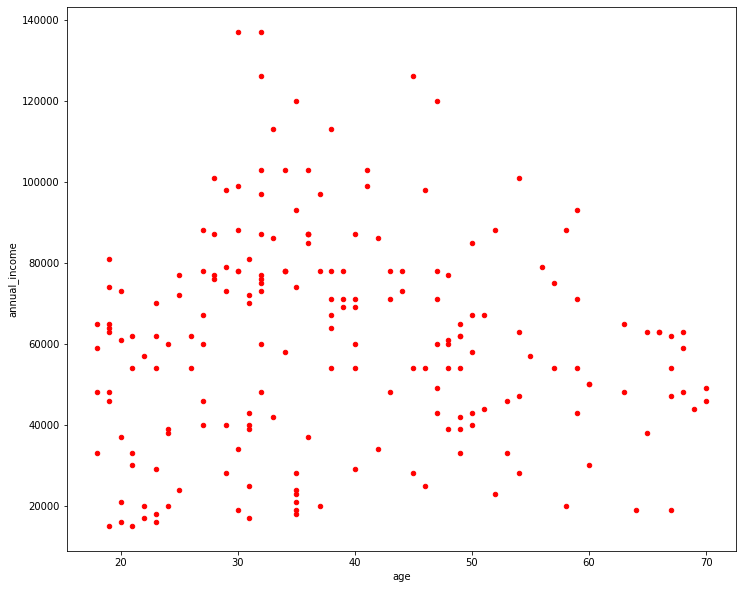

In [ ]:
#use a scatterplot to check outliers
df.plot.scatter(x = 'age',y = 'annual_income', c = 'red',figsize=(12,10))

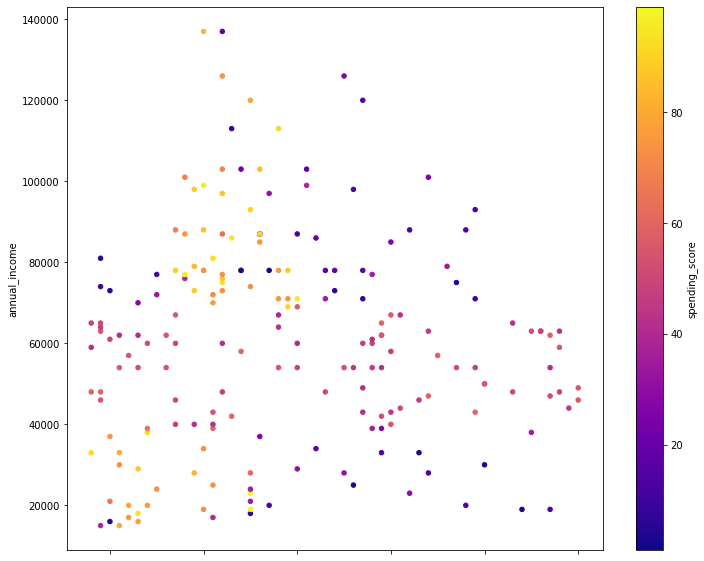

In [ ]:
#use a scatterplot to check outliers now with spending_score as the color
df.plot.scatter(x = 'age',y = 'annual_income', c = 'spending_score', colormap='plasma',figsize=(12,10))

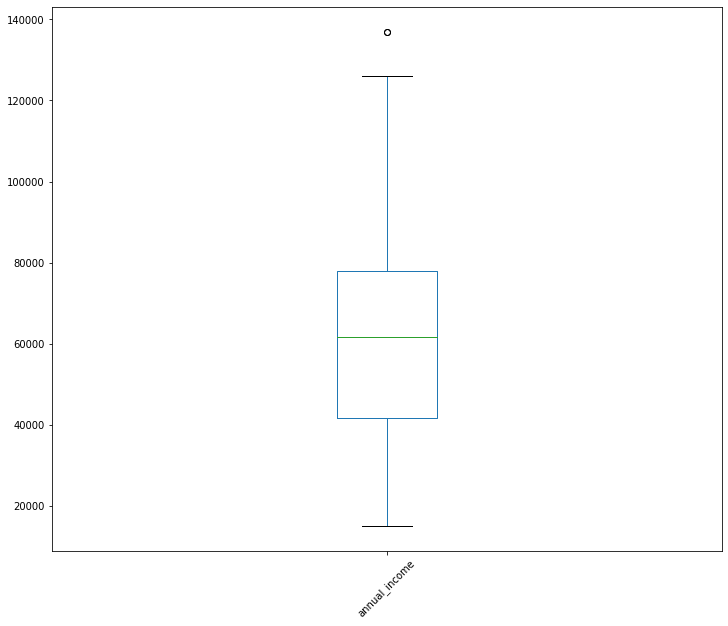

In [ ]:
#boxplots are veryr clear for outliers
boxplot = df.boxplot(column='annual_income',grid=False, rot =45,figsize=(12,10))

In [ ]:
#let's filter our dataframe to find a subset of interest
greater_than_100k = df.loc[df['annual_income']>100000]
greater_than_100k.sort_values('annual_income')

,customer_id,gender,age,annual_income,spending_score
186,187,Female,54,101000,24
187,188,Male,28,101000,68
188,189,Female,41,103000,17
189,190,Female,36,103000,85
190,191,Female,34,103000,23
191,192,Female,32,103000,69
192,193,Male,33,113000,8
193,194,Female,38,113000,91
194,195,Female,47,120000,16
195,196,Female,35,120000,79


In [ ]:
#create a copy to work on
df_outlier = stored_values.copy()

#let's check if any data is outside the IQR
IQR = df_outlier['annual_income'].quantile(.75) - df_outlier['annual_income'].quantile(.25)

#create a column in the data to report all instances of being outside the IQR
df_outlier['annual_income_outlier'] = False

#loop through the data checking what is outside the range
for index, row in df.iterrows():
  if row['annual_income'] > (df_outlier['annual_income'].quantile(.25)+1.5*IQR):
    df_outlier.at[index,'annual_income_outlier'] = True

outliers = df_outlier.loc[df_outlier['annual_income_outlier'] == True]
print(outliers)

     customer_id  gender  ...  spending_score  annual_income_outlier
180          181  Female  ...              32                   True
181          182  Female  ...              86                   True
182          183    Male  ...              15                   True
183          184  Female  ...              88                   True
184          185  Female  ...              39                   True
185          186    Male  ...              97                   True
186          187  Female  ...              24                   True
187          188    Male  ...              68                   True
188          189  Female  ...              17                   True
189          190  Female  ...              85                   True
190          191  Female  ...              23                   True
191          192  Female  ...              69                   True
192          193    Male  ...               8                   True
193          194  Female  ...     

In [ ]:
#one possibility to deal with this is to fill in the data with the median
#first create a cache of the not-outlier data
non_outliers = df_outlier.loc[df_outlier['annual_income_outlier'] == False]

#get the median
median = non_outliers['annual_income'].median()
print("The median is ", median)

#loop through and set every outlier to the median
for index, row in df_outlier.iterrows():
  if row['annual_income_outlier'] == True:
    df_outlier.at[index,'annual_income'] = median

#drop the last column
df_outlier.drop('annual_income_outlier', axis = 1,inplace=True)

#show the sample
df_outlier.sample(7)

The median is  58500.0


,customer_id,gender,age,annual_income,spending_score
45,46,Female,24,39000,65
49,50,Female,31,40000,42
115,116,Female,19,65000,50
181,182,Female,32,58500,86
42,43,Male,48,39000,36
117,118,Female,49,65000,59
133,134,Female,31,72000,71


#**Exploring Data, Preparing it, and Using a Regression**

In [ ]:
#read the data in from github
#we will try and predict price
#not there are both continuous and categorical data
cars = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data%20Preparation/carsData.csv")

#create a copy just in case
saved_cars = cars.copy()

cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
#let's print out the column names to see what we have
cars.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [ ]:
#we can see even more information using .info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
#check out the unique values of each column
for k in cars:
  print(np.unique(cars[k]),'\n')

['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrylser' 'Chrysler'
 'Dodge' 'Eagle' 'Ford' 'Geo' 'Honda' 'Hyundai' 'Infiniti' 'Lexus'
 'Lincoln' 'Mazda' 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan'
 'Oldsmobile' 'Plymouth' 'Pontiac' 'Saab' 'Saturn' 'Subaru' 'Suzuki'
 'Toyota' 'Volkswagen' 'Volvo'] 

['100' '190E' '240' '300E' '323' '535i' '626' '850' '90' '900' 'Accord'
 'Achieva' 'Aerostar' 'Altima' 'Astro' 'Bonneville' 'Camaro' 'Camry'
 'Capri' 'Caprice' 'Caravan' 'Cavalier' 'Celica' 'Century' 'Civic' 'Colt'
 'Concorde' 'Continental' 'Corrado' 'Corsica' 'Corvette' 'Cougar'
 'Crown_Victoria' 'Cutlass_Ciera' 'DeVille' 'Diamante' 'Dynasty' 'ES300'
 'Eighty-Eight' 'Elantra' 'Escort' 'Eurovan' 'Excel' 'Festiva' 'Firebird'
 'Fox' 'Grand_Prix' 'Imperial' 'Integra' 'Justy' 'Laser' 'LeBaron'
 'LeMans' 'LeSabre' 'Legacy' 'Legend' 'Loyale' 'Lumina' 'Lumina_APV' 'MPV'
 'Maxima' 'Metro' 'Mirage' 'Mustang' 'Passat' 'Prelude' 'Previa' 'Probe'
 'Protege' 'Q45' 'Quest' 'RX-7' 'Riviera' 'Ro

In [ ]:
#filter data 
#let's see all of the cars with a highway mpg greater than 35
highway = cars[cars['MPG.highway'] >= 35]
print(highway)

   Manufacturer     Model     Type  ...  Weight   Origin                Make
11    Chevrolet  Cavalier  Compact  ...    2490      USA  Chevrolet Cavalier
38          Geo     Metro    Small  ...    1695  non-USA           Geo Metro
39          Geo     Storm   Sporty  ...    2475  non-USA           Geo Storm
41        Honda     Civic    Small  ...    2350  non-USA         Honda Civic
52        Mazda       323    Small  ...    2325  non-USA           Mazda 323
53        Mazda   Protege    Small  ...    2440  non-USA       Mazda Protege
72      Pontiac    LeMans    Small  ...    2350      USA      Pontiac LeMans
78       Saturn        SL    Small  ...    2495      USA           Saturn SL
79       Subaru     Justy    Small  ...    2045  non-USA        Subaru Justy
82       Suzuki     Swift    Small  ...    1965  non-USA        Suzuki Swift
83       Toyota    Tercel    Small  ...    2055  non-USA       Toyota Tercel

[11 rows x 27 columns]


In [ ]:
#access data from a specific index using iloc
cars.iloc[[19,39,59]]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
19,Chrylser,Concorde,Large,18.4,18.4,18.4,20,28,Driver & Passenger,Front,6,3.3,153,5300,1990,No,18.0,6,203,113,74,40,31.0,15.0,3515,USA,Chrylser Concorde
39,Geo,Storm,Sporty,11.5,12.5,13.5,30,36,Driver only,Front,4,1.6,90,5400,3250,Yes,12.4,4,164,97,67,37,24.5,11.0,2475,non-USA,Geo Storm
59,Mercury,Capri,Sporty,13.3,14.1,15.0,23,26,Driver only,Front,4,1.6,100,5750,2475,Yes,11.1,4,166,95,65,36,19.0,6.0,2450,USA,Mercury Capri


In [ ]:
#check out null data
#we find only two with missing values
cars.isnull().any(axis=0)

Manufacturer          False
Model                 False
Type                  False
Min.Price             False
Price                 False
Max.Price             False
MPG.city              False
MPG.highway           False
AirBags               False
DriveTrain            False
Cylinders             False
EngineSize            False
Horsepower            False
RPM                   False
Rev.per.mile          False
Man.trans.avail       False
Fuel.tank.capacity    False
Passengers            False
Length                False
Wheelbase             False
Width                 False
Turn.circle           False
Rear.seat.room         True
Luggage.room           True
Weight                False
Origin                False
Make                  False
dtype: bool

In [ ]:
#how many missing values are there?
cars.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [ ]:
#find the indices with missing values
null_cloumns = cars[cars.isnull().any(axis=1)]
print(null_cloumns)

   Manufacturer       Model    Type  ...  Weight   Origin                   Make
15    Chevrolet  Lumina_APV     Van  ...    3715      USA   Chevrolet Lumina_APV
16    Chevrolet       Astro     Van  ...    4025      USA        Chevrolet Astro
18    Chevrolet    Corvette  Sporty  ...    3380      USA     Chevrolet Corvette
25        Dodge     Caravan     Van  ...    3705      USA          Dodge Caravan
35         Ford    Aerostar     Van  ...    3735      USA          Ford Aerostar
55        Mazda         MPV     Van  ...    3735  non-USA              Mazda MPV
56        Mazda        RX-7  Sporty  ...    2895  non-USA             Mazda RX-7
65       Nissan       Quest     Van  ...    4100  non-USA           Nissan Quest
69   Oldsmobile  Silhouette     Van  ...    3715      USA  Oldsmobile Silhouette
86       Toyota      Previa     Van  ...    3785  non-USA          Toyota Previa
88   Volkswagen     Eurovan     Van  ...    3960  non-USA     Volkswagen Eurovan

[11 rows x 27 columns]


In [ ]:
#I will delete the data
cars.dropna(inplace=True)
cars.shape

(82, 27)

In [ ]:
#choose some columns for our regression model
cars_selected = cars[['Manufacturer','Price','MPG.city','DriveTrain','EngineSize','Horsepower','Weight','Origin']].copy()
cars_selected.head()

,Manufacturer,Price,MPG.city,DriveTrain,EngineSize,Horsepower,Weight,Origin
0,Acura,15.9,25,Front,1.8,140,2705,non-USA
1,Acura,33.9,18,Front,3.2,200,3560,non-USA
2,Audi,29.1,20,Front,2.8,172,3375,non-USA
3,Audi,37.7,19,Front,2.8,172,3405,non-USA
4,BMW,30.0,22,Rear,3.5,208,3640,non-USA


In [ ]:
#we cannot use Origin unless we change the format of it
#we assign unique identifiers
#it 'looks' like it is ordered now, which may or may not be true
from sklearn.preprocessing import LabelEncoder as le 

label = le()
cars_selected['Origin'] = label.fit_transform(cars_selected['Origin'])
cars_selected.head()

,Manufacturer,Price,MPG.city,DriveTrain,EngineSize,Horsepower,Weight,Origin
0,Acura,15.9,25,Front,1.8,140,2705,1
1,Acura,33.9,18,Front,3.2,200,3560,1
2,Audi,29.1,20,Front,2.8,172,3375,1
3,Audi,37.7,19,Front,2.8,172,3405,1
4,BMW,30.0,22,Rear,3.5,208,3640,1


In [ ]:
#we need to change the drivetrain and manufacturer as well
#there is no ordering here, so we use get_dummies to create categories for each
#we have increased the features for each category
cars_selected = pd.get_dummies(cars_selected)
cars_selected.head()

,Price,MPG.city,EngineSize,Horsepower,Weight,Origin,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,Manufacturer_Geo,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Infiniti,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mazda,Manufacturer_Mercedes-Benz,Manufacturer_Mercury,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear
0,15.9,25,1.8,140,2705,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33.9,18,3.2,200,3560,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,29.1,20,2.8,172,3375,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,37.7,19,2.8,172,3405,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,30.0,22,3.5,208,3640,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#we now do basic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#A STICKING POINT: when using LinearRegression, sklearn says that X must be 2d
#for some suggestions either just make X 2D by adding variables, or
# writing X = cars_selected[['Horsepower']], or
#check out here: https://stackoverflow.com/questions/58663739/reshape-your-data-either-using-array-reshape-1-1-if-your-data-has-a-single-fe
#the above link uses 'reshape'
X = cars_selected[['Horsepower','MPG.city']]
y = cars_selected['Price']

#25% of the data is set aside to test the model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25)


In [ ]:
#set up the regression
lm = LinearRegression()
lm.fit(X_train, y_train)

#check the r-square on the data
lm.score(X_train,y_train)

0.6700491992856138

In [ ]:
#let's now see how it performs on test data
y_pred = lm.predict(X_test)
print(y_pred)

[11.48400492 25.24452577 10.05558813 15.25510987 23.1907587  25.07631118
 20.16571052  9.16982162 25.07631118 29.98691183 17.32788019 22.22897922
 20.01649917 14.65826445 14.65826445 45.85820948 23.48918141 13.3695574
 29.83770047 18.26115481  7.59219348]


In [ ]:
#here are the actual values versus the predicted ones
see_it = pd.DataFrame({'Test':y_test,'Predicted':y_pred})
see_it.head()

,Test,Predicted
80,10.9,11.484005
2,29.1,25.244526
87,9.1,10.055588
14,15.9,15.255110
66,21.5,23.190759


In [ ]:
#find the r-sqaure by testing on the training data
r2_score(y_test,y_pred)

0.2885489389788185

# **Feature Selection Techniques**

##Feature Selection Using Ratios

In [ ]:
#housing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read the data in from github
houses = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data%20Preparation/Melbourne%20Housing.csv")

#create a copy just in case
saved_houses = houses.copy()

houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#check the info about the data
print(houses.shape)

(34857, 21)


In [ ]:
#check how many null column values
houses.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
#sort the above so that we can understand what it looks like
empty_vals = houses.isnull().sum().sort_values(ascending=False)
print(empty_vals)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
Propertycount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64


In [ ]:
#check the proportions
empty_proportion = empty_vals/houses.shape[0]
print(empty_proportion)

BuildingArea     0.605761
YearBuilt        0.553863
Landsize         0.338813
Car              0.250394
Bathroom         0.235993
Bedroom2         0.235735
Longtitude       0.228821
Lattitude        0.228821
Price            0.218321
Regionname       0.000086
Propertycount    0.000086
CouncilArea      0.000086
Postcode         0.000029
Distance         0.000029
Date             0.000000
SellerG          0.000000
Method           0.000000
Type             0.000000
Rooms            0.000000
Address          0.000000
Suburb           0.000000
dtype: float64


In [ ]:
#we will convert the numeric data, so we need to be able to check for it
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for anything less than 25% I will fill in the median
for k in houses:
  if(empty_vals[k]/houses.shape[0] <=.26 and empty_vals[k]/houses.shape[0] >= 0 ):
    if(is_numeric_dtype(houses[k])):
      print(k)

Rooms
Price
Distance
Postcode
Bedroom2
Bathroom
Car
Lattitude
Longtitude
Propertycount


In [ ]:
#we will convert the numeric data, so we need to be able to check for it
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for anything less than 25% I will fill in the median
#I can ONLY CHANGE THE NUMERIC DATA with a median
#this will keep the central tendency statistic
for k in houses:
  if(empty_vals[k]/houses.shape[0] <=.26 and empty_vals[k]/houses.shape[0] >= 0 ):
    if(is_numeric_dtype(houses[k])):
      houses[k] = houses[k].fillna(houses[k].median())

#since Postcode is not numeric, we should really be finding the mode instead 

In [ ]:
#check the proportion again
empty_proportion = houses.isnull().sum().sort_values(ascending=False)/houses.shape[0]
print(empty_proportion)

BuildingArea     0.605761
YearBuilt        0.553863
Landsize         0.338813
CouncilArea      0.000086
Regionname       0.000086
Propertycount    0.000000
Date             0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Bedroom2         0.000000
Distance         0.000000
Postcode         0.000000
Bathroom         0.000000
Car              0.000000
Lattitude        0.000000
Longtitude       0.000000
Suburb           0.000000
dtype: float64


In [ ]:
for k in houses:
  if(houses[k].isnull().sum() > 0 and houses[k].isnull().sum()/houses.shape[0] < .26): 
    if(is_string_dtype(houses[k])):
      print(k)

CouncilArea
Regionname


In [ ]:
#I will now change the missing CATEGORICAL data with the mode
#notice that above we are putting in [0] next to the mode, 
#it's not clear why it should have a different syntax than mean() or median()

for k in houses:
  if(houses[k].isnull().sum() > 0 and houses[k].isnull().sum()/houses.shape[0] < .26): 
    if(is_string_dtype(houses[k])):
      houses[k].fillna(houses[k].mode()[0],inplace=True)

In [ ]:
#check that it worked
print(houses[['CouncilArea','Regionname']].isnull().sum())

CouncilArea    0
Regionname     0
dtype: int64


In [ ]:
#we still have missing data
#let's drop anything that has more than 30% missing
houses.dropna(thresh=int(houses.shape[0]*.7),axis = 1, inplace=True)

houses.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

##Visualizing Correlations

In [ ]:
#check the numeric types
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          34857 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34857 non-null  float64
 9   Postcode       34857 non-null  float64
 10  Bedroom2       34857 non-null  float64
 11  Bathroom       34857 non-null  float64
 12  Car            34857 non-null  float64
 13  CouncilArea    34857 non-null  object 
 14  Lattitude      34857 non-null  float64
 15  Longtitude     34857 non-null  float64
 16  Regionname     34857 non-null  object 
 17  Propertycount  34857 non-null  float64
dtypes: flo

In [ ]:
#check the numeric columns
numeric_columns = list(houses.select_dtypes(include=['float64','int64']).columns)
print(numeric_columns)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude', 'Longtitude', 'Propertycount']


In [ ]:
#select numeric columns
numeric_houses = houses[numeric_columns].copy()

print(numeric_columns,'\n')
print(numeric_houses.head())

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude', 'Longtitude', 'Propertycount'] 

   Rooms      Price  Distance  ...  Lattitude  Longtitude  Propertycount
0      2   870000.0       2.5  ...   -37.8014    144.9958         4019.0
1      2  1480000.0       2.5  ...   -37.7996    144.9984         4019.0
2      2  1035000.0       2.5  ...   -37.8079    144.9934         4019.0
3      3   870000.0       2.5  ...   -37.8114    145.0116         4019.0
4      3  1465000.0       2.5  ...   -37.8093    144.9944         4019.0

[5 rows x 10 columns]


**Pearson product moment correlation**
The Pearson correlation evaluates the linear relationship between two *continuous variables*, i.e. a change in one variable is associated with a proportional change in the other variable.

**Spearman rank-order correlation**
The Spearman correlation evaluates the monotonic relationship between two *continuous or ordinal variables*. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

In [ ]:
pearson_corr = numeric_houses.corr(method='pearson')
pearson_corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.391636,0.271511,0.085890,0.823813,0.481545,0.317095,0.002193,0.087080,-0.071664
Price,0.391636,1.000000,-0.181799,0.035050,0.320101,0.278823,0.137131,-0.162170,0.141937,-0.052816
Distance,0.271511,-0.181799,1.000000,0.481566,0.239957,0.102236,0.204163,-0.089834,0.178564,-0.018132
Postcode,0.085890,0.035050,0.481566,1.000000,0.080764,0.102332,0.058616,-0.208730,0.327168,0.017113
Bedroom2,0.823813,0.320101,0.239957,0.080764,1.000000,0.585415,0.375109,0.002951,0.104671,-0.046782
Bathroom,0.481545,0.278823,0.102236,0.102332,0.585415,1.000000,0.322755,-0.054439,0.108001,-0.021255
Car,0.317095,0.137131,0.204163,0.058616,0.375109,0.322755,1.000000,-0.007213,0.047814,-0.005168
Lattitude,0.002193,-0.162170,-0.089834,-0.208730,0.002951,-0.054439,-0.007213,1.000000,-0.345067,0.009892
Longtitude,0.087080,0.141937,0.178564,0.327168,0.104671,0.108001,0.047814,-0.345067,1.000000,0.014532
Propertycount,-0.071664,-0.052816,-0.018132,0.017113,-0.046782,-0.021255,-0.005168,0.009892,0.014532,1.000000


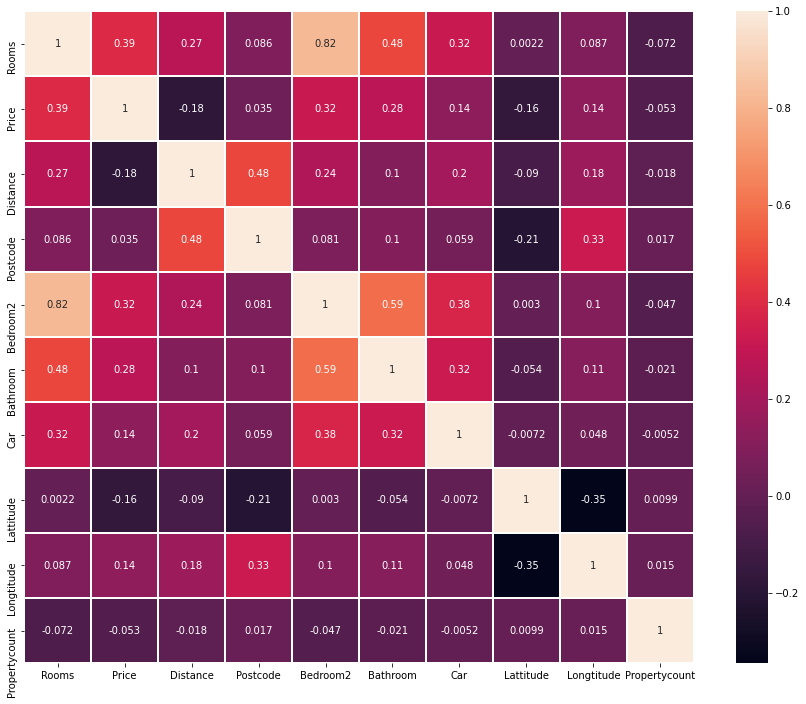

In [ ]:
#create a heatmap
plt.figure(figsize=(15,12))
sns.heatmap(pearson_corr,linewidth=1,annot=True,annot_kws={'size':10})

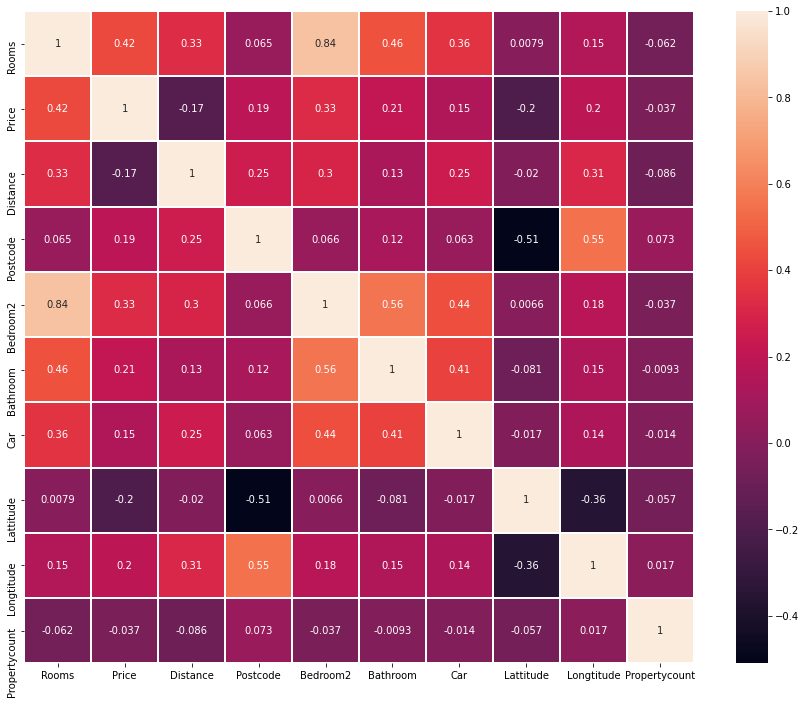

In [ ]:
#spearman (for ordinal values as well as continuous)
#for instance, a rating
#it looks for monotonic associations
spearman_corr = numeric_houses.corr(method='spearman')
plt.figure(figsize=(15,12))
sns.heatmap(spearman_corr,linewidth=1,annot=True,annot_kws={'size':10})

**Kendall rank correlation** is used to test the similarities in the ordering of data when it is ranked by quantities. Other types of correlation coefficients use the observations as the basis of the correlation, Kendall’s correlation coefficient uses pairs of observations and determines the strength of association based on the pattern on concordance and discordance between the pairs.

It is generally easier to interpret than Spearman correlation.

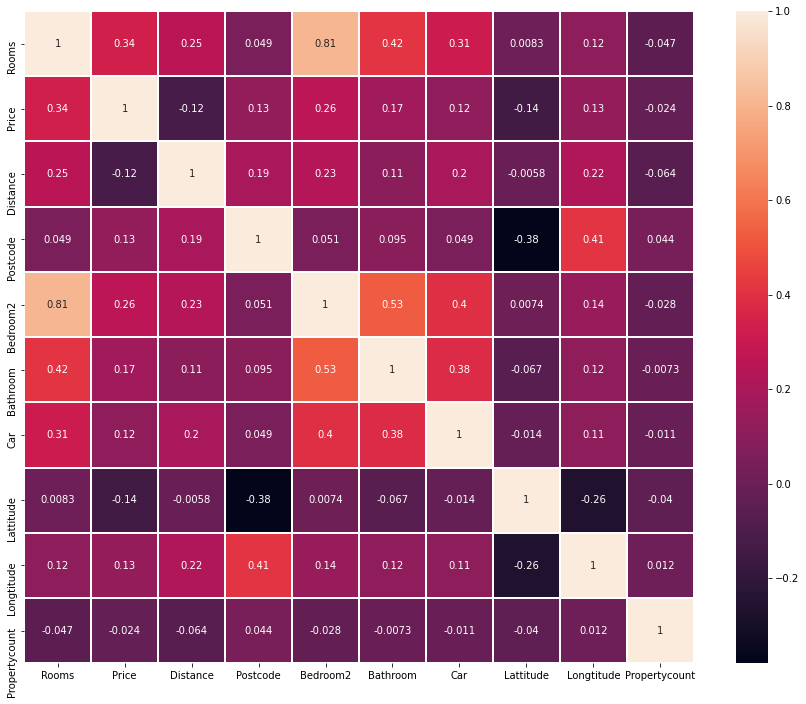

In [ ]:
#kendall (for ordinal values as well as continuous)
#for instance, a rating
#it looks for monotonic associations
kendall_corr = numeric_houses.corr(method='kendall')
plt.figure(figsize=(15,12))
sns.heatmap(kendall_corr,linewidth=1,annot=True,annot_kws={'size':10})

In [ ]:
numeric_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34857 non-null  int64  
 1   Price          34857 non-null  float64
 2   Distance       34857 non-null  float64
 3   Postcode       34857 non-null  float64
 4   Bedroom2       34857 non-null  float64
 5   Bathroom       34857 non-null  float64
 6   Car            34857 non-null  float64
 7   Lattitude      34857 non-null  float64
 8   Longtitude     34857 non-null  float64
 9   Propertycount  34857 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.7 MB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


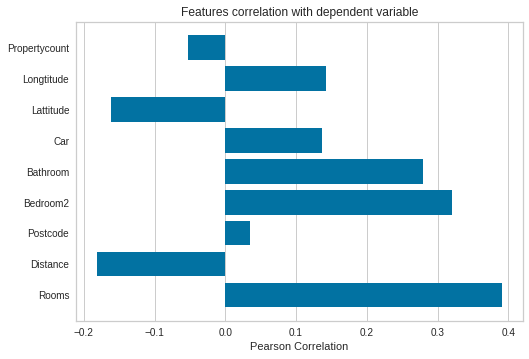

In [ ]:
#using yellowbrick for visualizations
from yellowbrick.target import FeatureCorrelation

target = numeric_houses['Price']
features = numeric_houses.drop('Price',axis=1).copy()
feature_names = list(features.columns)

visualizer = FeatureCorrelation(labels=feature_names,method='pearson')
visualizer.fit(features,target)
visualizer.poof()

###Mutual Information

In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons, commonly called bits) obtained about one random variable through observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable. (Wiki)

In short, it measures the amount of information one can obtain from one random variable given another. Or, the average reduction in uncertainty about x that results from learning the value of y; or vice versa, the average amount of information that x conveys about y.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


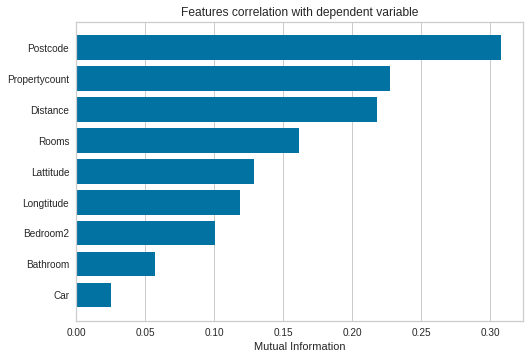

In [ ]:
#find mutual-information
#here we use regression, but there is also
#visualizer = FeatureCorrelation(method='mutual_info-classification', feature_names=features, sort=True)

visualizer = FeatureCorrelation(method='mutual_info-regression',features_names=feature_names,sort=True)
visualizer.fit(features,target)
visualizer.poof()

#Feature Selection Comparison

We will use several different methods (kbest, rfe, backward elimination, and lasso method) to find the top five most influential features for Price.  We will then compare these and pick the best to use.  

Each idea will be explained in its place.

###K-Best with an F-Regression

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. (Wiki)

The F-distribution is formed by the ratio of two independent chi-square variables divided by their respective degrees of freedom. Since F is formed by chi-square, many of the chi-square properties carry over to the F distribution.

* The F-values are all non-negative
* The distribution is non-symmetric
* The mean is approximately 1
* There are two independent degrees of freedom, one for the numerator, and one for the denominator.
* There are many different F distributions, one for each pair of degrees of freedom.

The F-test is designed to test if two population variances are equal. It does this by comparing the ratio of two variances. So, if the variances are equal, the ratio of the variances will be 1. ([link](https://people.richland.edu/james/lecture/m170/ch13-f.html))

In general, one would expect that p-values are used to find features that are significantly better, but it seems the scikit-learn implementation is effectively the same as just choosing the best k cases in a regression analysis of each variable against our target.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = numeric_houses['Price']
features = numeric_houses.drop('Price',axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", numeric_houses.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object') 

Chosen features:  Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Lattitude'], dtype='object') 



array([6314.53808415, 1191.3577802 ,   42.87218707, 3979.11942499,
       2938.12664846,  668.00599587,  941.41270519,  716.62799056,
         97.49924202])

In [ ]:
#see which feature is associated with which score
scores = pd.DataFrame({'Feature Name' : features.columns, 'Score' : selection_kBest.scores_}).sort_values(by='Score',ascending=False)
print(scores)

    Feature Name        Score
0          Rooms  6314.538084
3       Bedroom2  3979.119425
4       Bathroom  2938.126648
1       Distance  1191.357780
6      Lattitude   941.412705
7     Longtitude   716.627991
5            Car   668.005996
8  Propertycount    97.499242
2       Postcode    42.872187


In [ ]:
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

      Chosen
0      Rooms
1   Distance
2   Bedroom2
3   Bathroom
4  Lattitude


###RFE - Recursive Feature Elimination

RFE is a feature selection algorithm.  It is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method.  It is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least.  At each stage of the search, the least important predictors are iteratively eliminated prior to rebuilding the model. ([link](https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=Recursive%20Feature%20Elimination%2C%20or%20RFE%20for%20short%2C%20is%20a%20feature,columns%2C%20like%20an%20excel%20spreadsheet.&text=Feature%20selection%20refers%20to%20techniques,(columns)%20for%20a%20dataset))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#to wrap on RFE
lr = LinearRegression()

#prune one feature on each iteration
#select 3
rfe = RFE(estimator = lr, n_features_to_select = 5, step = 1)

rfe.fit(features,target)

rfe_features = features.columns[rfe.support_]
print(rfe_features)

NameError: ignored

In [ ]:
rfe_output = pd.DataFrame({'Features' : features.columns, "Rank" : rfe.ranking_}).sort_values(by="Rank")

#output the entire list
print(rfe_output)

###Forward and Backward Selection

Backward elimination process - [link](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4)

Forward elimination process - [link](https://towardsdatascience.com/using-forward-selection-to-filter-out-unnecessary-features-in-a-machine-learning-dataset-e36c62431781)

Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features. [link](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/#:~:text=Forward%20Selection%3A%20Forward%20selection%20is,the%20performance%20of%20the%20model.)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

target = numeric_houses['Price']
features = numeric_houses.drop('Price',axis=1).copy()
feature_names = list(features.columns)

#backward selection
feature_selector = SequentialFeatureSelector(LinearRegression(),k_features =5, forward=False,scoring='neg_mean_squared_error',cv=4)

#this step is strange, but we are using features.values and target.values to convert the data to numpy in order to run
feature_filtered = feature_selector.fit(features.values, target.values)

#list which features are included
backward_features = list(feature_filtered.k_feature_names_)
print(backward_features, '\n')


original_features = pd.DataFrame({'Features' : features.columns})
print(original_features)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

In [ ]:
#get a list of the actual names 
#convert it to a dataFrame

backward_df = []

for k in backward_features:
  backward_df.append(original_features['Features'].loc[int(k)])

backward_df = pd.DataFrame({'Backward': backward_df})
print(backward_df)

###Lasso Regression

The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.

By penalizing (or equivalently constraining the sum of the absolute values of the estimates) you end up in a situation where some of the parameter estimates may be exactly zero. The larger the penalty applied, the further estimates are shrunk towards zero.

This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors

In [ ]:
from sklearn.linear_model import Lasso

#1.0 is the strongest regularization
#the most important features are those far away from zero
lasso = Lasso(alpha=1.0).fit(features,target)

lasso_info = pd.DataFrame({'Features' :features.columns, 'LassoCoef':lasso.coef_}).sort_values(by='LassoCoef',ascending = False)

print(lasso_info)

        Features     LassoCoef
7     Longtitude  4.218430e+05
0          Rooms  2.824159e+05
4       Bathroom  6.981035e+04
5            Car  3.470059e+04
2       Postcode  6.724933e+02
8  Propertycount -3.715810e+00
1       Distance -3.407740e+04
3       Bedroom2 -4.234486e+04
6      Lattitude -1.015150e+06


In [ ]:
#use the absolute values
lasso_info['LassoCoef'] = abs(lasso_info['LassoCoef'])
lasso_df = lasso_info.sort_values(by='LassoCoef',ascending=False)
print(lasso_df)

        Features     LassoCoef
6      Lattitude  1.015150e+06
7     Longtitude  4.218430e+05
0          Rooms  2.824159e+05
4       Bathroom  6.981035e+04
3       Bedroom2  4.234486e+04
5            Car  3.470059e+04
1       Distance  3.407740e+04
2       Postcode  6.724933e+02
8  Propertycount  3.715810e+00


###Gather all the Feature Selections

In [ ]:
#get all the different tables of chosen options

univariate_analysis_df = pd.DataFrame({'Univariate' : features.columns[features_kbest]})
rfe_analysis_df = pd.DataFrame({'RFE' : rfe_output['Features'].head(5).values})
backward_analysis_df = backward_df
lasso_analysis_df = pd.DataFrame({'Lasso' : lasso_df['Features'].head(5).values})

selected = [univariate_analysis_df,rfe_analysis_df,backward_analysis_df, lasso_analysis_df]
final_df = pd.concat(selected, axis=1)

print(final_df)

  Univariate         RFE    Backward       Lasso
0      Rooms       Rooms       Rooms   Lattitude
1   Distance    Bedroom2    Distance  Longtitude
2   Bedroom2    Bathroom    Postcode       Rooms
3   Bathroom   Lattitude   Lattitude    Bathroom
4  Lattitude  Longtitude  Longtitude    Bedroom2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def score(name,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
  le = LinearRegression(normalize=True).fit(X_train,y_train)
  print(name)
  print('Training score:\t ', le.score(X_train,y_train))

  y_pred = le.predict(X_test)
  print('r2_score:\t ', r2_score(y_test,y_pred))

In [ ]:
#print out all the values
#reminder: features is still all the values outside of Price and target is Price

for k in final_df.columns:
  score(k,features[final_df[k].values],target)
  print()

Univariate
Training score:	  0.28685390517028087
r2_score:	  0.2876638030198303

RFE
Training score:	  0.18996309340207695
r2_score:	  0.2065323328488311

Backward
Training score:	  0.29930392873548384
r2_score:	  0.3121459494378439

Lasso
Training score:	  0.19236414415353575
r2_score:	  0.1953918216719176



###Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=6)
decision_tree.fit(features, target)

predictors = features.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

Bedroom2         0.000000
Car              0.004114
Lattitude        0.008875
Propertycount    0.011631
Longtitude       0.020018
Bathroom         0.026355
Postcode         0.210284
Rooms            0.354094
Distance         0.364629
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2)
    
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
    
print("Test_score : ", r2_score(y_test, y_pred))

Test_score :  0.3210813977996064


We note that the decision tree did better than our other models.

##MultiCollinearity

Multicollinearity occurs when two or more independent variables are highly correlated in a regression model.  It can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.  It may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

It may occur due to the original data set, new varaibles which were created during feature engineering, dummy variables which were created and relay the same information, or if we simply have insufficient data.


<br></br>
###Variance Inflation Factors

Variance Inflation Factors (VIF) determines the strength of the correlation between the independent variables. As the name implies, it determines how much the variance is inflated.  It is predicted by taking a variable and regressing it against every other variable. It represents how well the variable is explained by other independent variables.

The formula is 1/(1-r^2).  We do ANOVA analysis and then take the r^2 and plug it into the formula.  We do this for each variable.  The higher the value the more mulitcollinearity exists in the variable.

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated

In [ ]:
automobile = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data%20Preparation/cars_processed.csv')

automobile.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,49
1,16.000000,8,304.0,150,3433,12.0,US,49
2,17.000000,8,302.0,140,3449,10.5,US,49
3,14.000000,8,454.0,220,4354,9.0,US,49
4,23.551429,8,440.0,215,4312,8.5,US,49


In [ ]:
#transform the columns into floats
automobile_floats = automobile.drop('Origin',axis =1)

automobile_floats.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
0,18.000000,8,307.0,130,3504,12.0,49
1,16.000000,8,304.0,150,3433,12.0,49
2,17.000000,8,302.0,140,3449,10.5,49
3,14.000000,8,454.0,220,4354,9.0,49
4,23.551429,8,440.0,215,4312,8.5,49


In [ ]:
automobile_floats = automobile_floats.apply(pd.to_numeric)
automobile_floats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           387 non-null    float64
 1   Cylinders     387 non-null    int64  
 2   Displacement  387 non-null    float64
 3   Horsepower    387 non-null    int64  
 4   Weight        387 non-null    int64  
 5   Acceleration  387 non-null    float64
 6   Age           387 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.3 KB


In [ ]:
automobile_floats.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
0,18.000000,8,307.0,130,3504,12.0,49
1,16.000000,8,304.0,150,3433,12.0,49
2,17.000000,8,302.0,140,3449,10.5,49
3,14.000000,8,454.0,220,4354,9.0,49
4,23.551429,8,440.0,215,4312,8.5,49


Scale the data using StandardScaler()

We want to output a df, and not a numpy array. So we use it somewhat non-standard way [link](https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num)

In [ ]:
#scale the data

from sklearn.preprocessing import StandardScaler
automobile_floats[automobile_floats.columns] = StandardScaler().fit_transform(automobile_floats[automobile_floats.columns])

In [ ]:
automobile_floats.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
0,-0.734156,1.554447,1.108580,0.692081,0.637231,-1.302961,1.660135
1,-0.993003,1.554447,1.079614,1.217300,0.553231,-1.302961,1.660135
2,-0.863580,1.554447,1.060303,0.954691,0.572161,-1.849865,1.660135
3,-1.251850,1.554447,2.527915,3.055566,1.642864,-2.396769,1.660135
4,-0.015671,1.554447,2.392740,2.924262,1.593174,-2.579071,1.660135


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#it seems, that the fellow who made VIF, felt there should be a 
#constant column in front, as such, we need to put one in (of all 1s)
X = add_constant(automobile_floats)

#now that we are set up, we can use VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF Factor,features
0,1.00,const
1,4.70,MPG
2,6.87,Cylinders
3,16.18,Displacement
4,8.82,Horsepower
5,13.27,Weight
6,2.49,Acceleration
7,1.81,Age


In [ ]:
#now drop the three highest VIFs
automobile_floats = automobile_floats.drop(['Displacement','Horsepower','Weight'],axis =1)
automobile_floats.head()

,MPG,Cylinders,Acceleration,Age
0,-0.734156,1.554447,-1.302961,1.660135
1,-0.993003,1.554447,-1.302961,1.660135
2,-0.863580,1.554447,-1.849865,1.660135
3,-1.251850,1.554447,-2.396769,1.660135
4,-0.015671,1.554447,-2.579071,1.660135


In [ ]:
#now go and check out the regression
#if we want to compare, we could have done it beforer VIF as well
#we will regress to find the MPG

y = automobile_floats['MPG']
X = automobile_floats.drop('MPG',axis =1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
le = LinearRegression(normalize=True).fit(x_train,y_train)
y_pred = le.predict(x_test)
print("Training score: ", le.score(x_train, y_train))
print("Testing_score : ", r2_score(y_test, y_pred))

Training score:  0.6921099421194027
Testing_score :  0.5897936499007065


##Chi-Square

This is used for categorical data. We choose features with the highest chi-square.  We can use SelectKBest to automate this.  However, we will lose our columns headers, so we may as well do without SelectKBest as well.

Chi-square tests the independence of two events. Given the data of two variables, or sets of variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

We use it to determine the relationship between the independent category feature (predictor) and dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response.

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

Steps for Chi-Square Test with an example:
1. Define Hypothesis.
2. Build a Contingency table.
3. Find the expected values.
4. Calculate the Chi-Square statistic.
5. Accept or Reject the Null Hypothesis.

The degrees of freedom are n-1, where n is the number of tested features.  We will do only one version of this here. Generally, one can get both the scores and the p-values.

We will use the previous diabetes data.

In [ ]:
adult = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data%20Preparation/Adult_Data.csv')

adult.head(5)

,Age,Job,Income,Schooling,Married_Status,Job_Type,Color_Race,Gender,Place
0,39,State-gov,78000,Bachelors,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83000,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,216000,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,235000,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338000,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba


In [ ]:
#replace ? with nan

for k in adult.columns:
  adult[k].replace('?', np.nan, inplace= True)


In [ ]:
#fill in the mode of each column instead of nan
adult = adult.fillna(adult.mode().iloc[0])

adult.isnull().sum()

Age               0
Job               0
Income            0
Schooling         0
Married_Status    0
Job_Type          0
Color_Race        0
Gender            0
Place             0
dtype: int64

In [ ]:
adult.nunique()

Age                73
Job                 9
Income            665
Schooling          16
Married_Status      7
Job_Type           15
Color_Race          5
Gender              2
Place              42
dtype: int64

In [ ]:
#we will be looking for Income
X = adult.drop('Income',1)
y = adult['Income']

#chi-square here requires numbers
#so let's transfrom our data with a lableencoder
#the reason we use X.apply is because LabelEncoder() really only takes in numpy arrays
from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)

In [ ]:
print(X.head())

   Age  Job  Schooling  Married_Status  Job_Type  Color_Race  Gender  Place
0   22    7          9               4         1           4       1     39
1   33    6          9               2         4           4       1     39
2   21    4         11               0         6           4       1     39
3   36    4          1               2         6           2       1     39
4   11    4          9               2        10           2       0      5


In [ ]:
#chi-square analysis
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [ ]:
feature_score = pd.DataFrame()

for i in range(X.shape[1]):
    new = pd.DataFrame({'Features' : X.columns[i],
                        'Score' : fit.scores_[i]}, index=[i])
    
    feature_score = pd.concat([feature_score, new])

In [ ]:
#we will select those 
feature_score

,Features,Score
0,Age,10963.258800
1,Job,407.195709
2,Schooling,1138.176807
3,Married_Status,677.719150
4,Job_Type,1978.368371
5,Color_Race,309.695618
6,Gender,353.213327
7,Place,1630.917203


In [ ]:
X_new = fit.transform(X)
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3
0,22,9,1,39
1,33,9,4,39
2,21,11,6,39
3,36,1,6,39
4,11,9,10,5


Challenge 1: Create a function to identify which columns those 4 represent and give them names.

Challenge 2: Undo the LableEncoding

###PCA

In [ ]:
#get some numeric data
filename = "https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data%20Preparation/diabetesData.csv"
pca_df = pd.read_csv(filename)

#create a copy just in case
pca_stored = pca_df.copy()

print(pca_df.shape)
print(pca_df.head())

(768, 9)
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#drop the column we will be looking for
pca_test = pca_df.drop('Pregnancies', 1)

#normalize data
data_scaled = pd.DataFrame(preprocessing.scale(pca_test),columns = pca_test.columns)

#do PCA
pca = PCA(n_components = len(data_scaled.columns))  
x_new = pca.fit_transform(data_scaled)
x_new = pd.DataFrame(x_new)

In [ ]:
print(x_new)

            0         1         2  ...         5         6         7
0    1.488423  1.281761 -0.027307  ...  0.892498  0.637542  0.879289
1   -1.316778 -0.670285 -0.551187  ...  0.536630  0.503052  0.368952
2    0.219328  2.060282  1.649702  ... -1.323465  0.495766  0.650278
3   -1.308869 -1.160812 -0.293776  ... -0.085001  0.338156 -0.229295
4    3.006376 -0.991208  3.204475  ...  0.415513 -0.729468 -0.042486
..        ...       ...       ...  ...       ...       ...       ...
763  0.801307 -0.068542 -1.633162  ...  2.502209 -0.088434  0.157219
764 -0.323716 -0.595487 -0.635766  ... -0.180306 -0.465649  0.701947
765 -0.626333 -0.396294 -0.246927  ... -0.182854  0.155241  0.235761
766 -0.257473  2.169690  0.435336  ...  0.463705  0.245315 -0.499533
767 -1.052088 -1.097762 -0.647299  ...  0.009490  0.382006  0.474906

[768 rows x 8 columns]


In [ ]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.287773   0.17927035 0.13659066 0.1092815  0.10317038 0.07421412
 0.06084113 0.04885886]


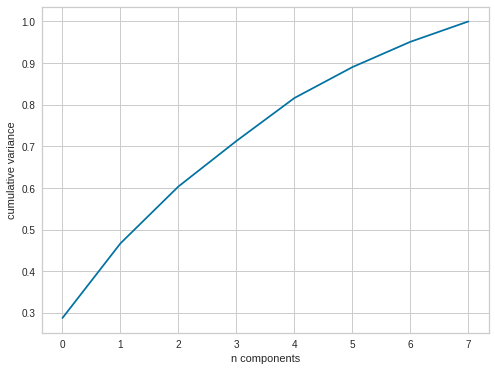

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [ ]:
#now that we see that five components explain 90% the data
#we will transform this again and keep those five for the regression

#do PCA
pca = PCA(n_components = 5)  
x_new = pca.fit_transform(data_scaled)
x_new = pd.DataFrame(x_new)

print(x_new)

            0         1         2         3         4
0    1.488423  1.281761 -0.027307  0.479774 -0.374323
1   -1.316778 -0.670285 -0.551187  0.231630  0.077480
2    0.219328  2.060282  1.649702  0.069528 -0.084741
3   -1.308869 -1.160812 -0.293776 -0.670436  0.058516
4    3.006376 -0.991208  3.204475  4.047336 -0.698955
..        ...       ...       ...       ...       ...
763  0.801307 -0.068542 -1.633162 -0.443154  1.490702
764 -0.323716 -0.595487 -0.635766 -0.187784 -0.596485
765 -0.626333 -0.396294 -0.246927 -0.651460  0.773731
766 -0.257473  2.169690  0.435336 -0.085366 -0.568349
767 -1.052088 -1.097762 -0.647299 -0.029865 -0.363886

[768 rows x 5 columns]


###SVD

In scikit-learn, factor analysis is done with SVD. It is similar to PCA, but if you were to have highly correlated data, the PCA would leave them that way, while the SVD will transform them to be uncorrelated.

